In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'D:\Data sets\weight_height_data.csv')

In [5]:
df

,Weight (kg),Height (cm)
0,55,160
1,68,175
2,72,180
3,60,165
4,80,185
5,50,155
6,90,190
7,77,178
8,85,182
9,65,170


In [6]:
df.shape

(10, 2)

Text(0, 0.5, 'height')

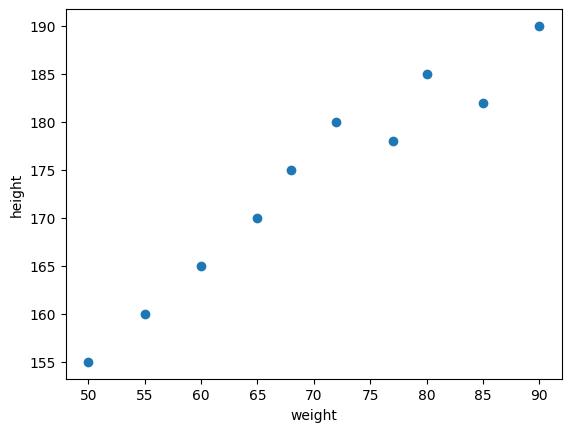

In [8]:
# checking relationship between independent and dependent features:

plt.scatter(df['Weight (kg)'], df['Height (cm)'])
plt.xlabel('weight')
plt.ylabel('height')

In [9]:
# checking for correlation of data set

df.corr()

,Weight (kg),Height (cm)
Weight (kg),1.000000,0.971342
Height (cm),0.971342,1.000000


<Axes: >

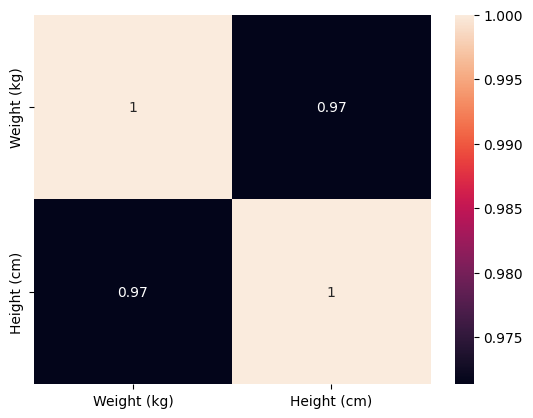

In [13]:
# visulaizing the correlatiom:

sns.heatmap(df.corr(),
            annot= True)

In [14]:
# Dividing dataset into dependent and indeendent variable:

x = df[['Weight (kg)']] # independent variable should be always in 2-D array or dataframe

In [16]:
np.array(x).shape

(10, 1)

In [17]:
y = df['Height (cm)']

In [18]:
np.array(y).shape

(10,)

In [20]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size= 0.20,
                                                    random_state= 42)

In [29]:
x_train

,Weight (kg)
5,50
0,55
7,77
2,72
9,65
4,80
3,60
6,90


In [28]:
x_test

,Weight (kg)
8,85
1,68


In [30]:
y_train

5    155
0    160
7    178
2    180
9    170
4    185
3    165
6    190
Name: Height (cm), dtype: int64

In [31]:
y_test

8    182
1    175
Name: Height (cm), dtype: int64

In [33]:
# standardixation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
x_train

array([[-1.46792686],
       [-1.07385254],
       [ 0.6600745 ],
       [ 0.26600017],
       [-0.28570389],
       [ 0.89651909],
       [-0.67977821],
       [ 1.68466774]])

In [35]:
x_test

array([[ 1.29059342],
       [-0.04925929]])

In [37]:
# applying linear regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs= -1)
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [38]:
print('coefficient or slope:', regression.coef_)
print('intercept:', regression.intercept_)

coefficient or slope: [11.40475729]
intercept: 172.875


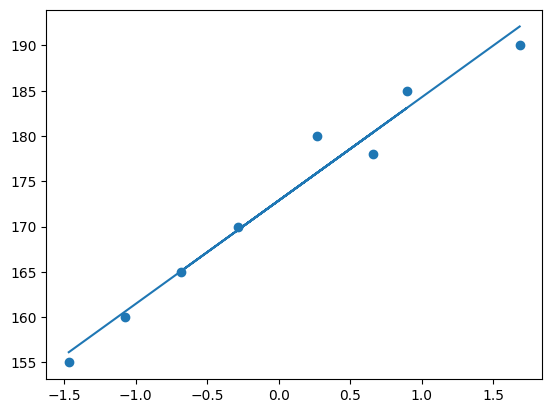

In [40]:
# plotting the training data best fit line

plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

In [41]:
# prediction for test data:

y_prediction = regression.predict(x_test)

In [42]:
y_prediction

array([187.59390469, 172.31320974])

In [45]:
# perforance metrics:

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)



19.25530576685697
4.140347471610212
4.388086800287452


In [48]:
# R-Score

from sklearn.metrics import r2_score

rscore = r2_score(y_test, y_prediction)
rscore

-0.5718616952536302

In [58]:
# prediction for new data

regression.predict(scaler.transform([[80]]))

d:\Udemy_python_practise\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([183.09958265])